In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# [데이터 전처리&시각화]

# # 팀 기록 중 필요한 피처 선정 근거를 시각화

## ## 파일 불러오기

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝/2조_머신러닝_미니프로젝트/res/raw_data/20년 KBO리그.csv')

df

,Unnamed: 0,연도,팀명,G,W,D,L,WPCT,R,R(A),...,PB,SB,CS,CS%,SBA(R),SB(R),CS(R),SB(R)%,OOB,PKO(R)
0,0,2001,KIA,133,60,5,68,0.469,683,727,...,10,100,53,34.6,155,92,63,59.4,0,0
1,1,2001,LG,133,58,8,67,0.464,669,732,...,16,110,55,33.3,154,96,58,62.3,0,0
2,2,2001,SK,133,60,2,71,0.458,596,640,...,19,106,44,29.3,182,123,59,67.6,0,0
3,3,2001,두산,133,65,5,63,0.508,732,733,...,12,126,56,30.8,166,132,34,79.5,0,0
4,4,2001,롯데,133,59,4,70,0.457,718,670,...,12,85,58,40.6,159,106,53,66.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,179,2021,두산,144,71,8,65,0.522,738,656,...,10,83,48,36.6,118,81,37,68.6,48,11
180,180,2021,롯데,144,65,8,71,0.478,727,808,...,8,101,44,30.3,91,60,31,65.9,54,8
181,181,2021,삼성,144,76,9,59,0.563,712,658,...,5,61,26,29.9,160,116,44,72.5,47,7
182,182,2021,키움,144,70,7,67,0.511,722,700,...,5,85,35,29.2,123,97,26,78.9,39,3


## ## 승리에 영향을 미치는 피처 선택


In [ ]:
features = ['AVG', 'OPS', 'RISP', 'PH-BA', 'ERA', 'WHIP', 'FPCT']

In [ ]:
list(df.loc[df['WIN'] == 1, features])

['AVG', 'OPS', 'RISP', 'PH-BA', 'ERA', 'WHIP', 'FPCT']

## ## 20년 동안 승리한 팀의 기록 평균

In [ ]:
win = df.loc[df['WIN'] == 'Y', features].mean()
win

AVG      0.278619
OPS      0.783429
RISP     0.285571
PH-BA    0.227619
ERA      4.011905
WHIP     1.368571
FPCT     0.982619
dtype: float64

## ## 20년동안 포스트 시즌 진출한 팀의 기록 평균

In [ ]:
post = df.loc[df['POST'] == 'Y', features].mean()

post

AVG      0.276708
OPS      0.774157
RISP     0.281011
PH-BA    0.227562
ERA      4.196854
WHIP     1.398202
FPCT     0.982494
dtype: float64

## ## 모든팀 기록의 평균

In [ ]:
all = df.loc[:, features].mean()

all

AVG      0.271228
OPS      0.753668
RISP     0.273332
PH-BA    0.225315
ERA      4.494022
WHIP     1.444239
FPCT     0.981973
dtype: float64

## ## 시각화를 위해 표를 새로 생성

### ### zip() 함수
  * 시리즈 데이터를 가로로 합친다.

In [ ]:
feature_df = pd.DataFrame(zip(features,win,post,all),
                          columns=['CATE','WIN', 'POST', 'ALL'])

feature_df

,CATE,WIN,POST,ALL
0,AVG,0.278619,0.276708,0.271228
1,OPS,0.783429,0.774157,0.753668
2,RISP,0.285571,0.281011,0.273332
3,PH-BA,0.227619,0.227562,0.225315
4,ERA,4.011905,4.196854,4.494022
5,WHIP,1.368571,1.398202,1.444239
6,FPCT,0.982619,0.982494,0.981973


### ### 필요한 라이브러리 불러오기

In [ ]:
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

%matplotlib inline

### ### 한글 폰트 장착

In [ ]:
title_font = fm.FontProperties(fname='/content/drive/MyDrive/Colab Notebooks/머신러닝/2조_머신러닝_미니프로젝트/res/NanumGothicBold.ttf', size=20)

## ## 차트 생성

### ### barplot으로 feature_df에서 승리팀의 기록 시각화

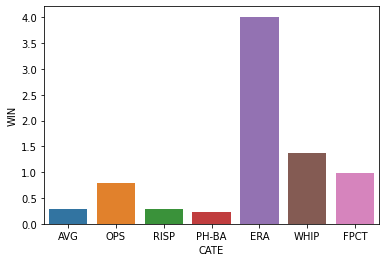

In [ ]:
sns.barplot(x='CATE',
            y='WIN',
            data=feature_df
            )

### ### 쓰이는 함수 정리
  * [melt() 이해](https://koreadatascientist.tistory.com/12)
    - id_vars = 기준 컬럼
  * rename(columns=str.title)
    - 컬럼명의 단어들을 첫번째 글자는 대문자로 나머지 글자들은 소문자로 rename
  * [sns.despine()](https://hleecaster.com/python-seaborn-set-style-and-context/)이라고 지정하면 테두리를 제거한다. 아무것도 넣지 않으면 기본적으로 top, right 두 개를 제거해준다.
  * [ax.patches](https://dailyheumsi.tistory.com/98) 는 ax가 가르키는 그래프에서, 막대들을 담고있는 리스트
  * [hue=](https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html)카테고리 값에 따라 색상을 다르게

In [ ]:
# feature_df = 승리팀, 포스트 시즌 진출팀, 모든팀

graph_df = feature_df.melt(id_vars='CATE').rename(columns=str.title)

graph_df

,Cate,Variable,Value
0,AVG,WIN,0.278619
1,OPS,WIN,0.783429
2,RISP,WIN,0.285571
3,PH-BA,WIN,0.227619
4,ERA,WIN,4.011905
5,WHIP,WIN,1.368571
6,FPCT,WIN,0.982619
7,AVG,POST,0.276708
8,OPS,POST,0.774157
9,RISP,POST,0.281011


In [ ]:
feature_df

,CATE,WIN,POST,ALL
0,AVG,0.278619,0.276708,0.271228
1,OPS,0.783429,0.774157,0.753668
2,RISP,0.285571,0.281011,0.273332
3,PH-BA,0.227619,0.227562,0.225315
4,ERA,4.011905,4.196854,4.494022
5,WHIP,1.368571,1.398202,1.444239
6,FPCT,0.982619,0.982494,0.981973


[]

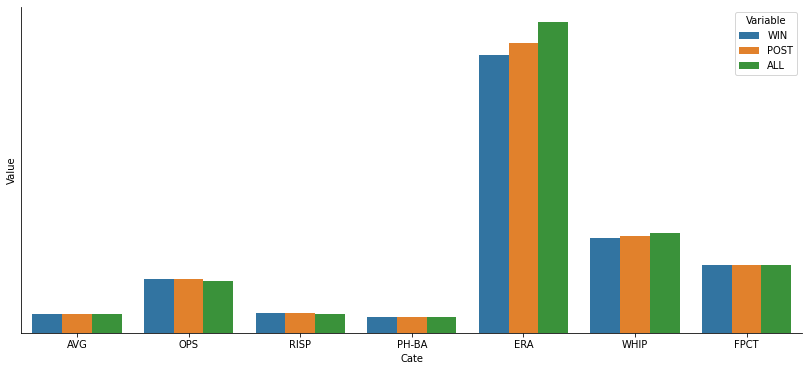

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

# feature_df = 승리팀, 포스트 시즌 진출팀, 모든팀 기록

graph_df = feature_df.melt(id_vars='CATE').rename(columns=str.title)

sns.barplot(x='Cate',
            y='Value',
            hue='Variable',
            data=graph_df,
            ax=ax # barplot을 그려줄 곳
            )

sns.despine(fig)

ax.grid(False)
ax.set_yticks([])

#### #### 각 막대에 대한 정보
  * ax = 축의 정보
  * ax.patches = 축에 있는 모든 막대의 정보

In [ ]:
ax.patches

#### #### 도형화된 그래프 x축 값

In [ ]:
for i in range(len(ax.patches)):
  print(ax.patches[i].get_x())

-0.4
0.6
1.6
2.6
3.6
4.6
5.6
-0.13333333333333333
0.8666666666666667
1.8666666666666667
2.8666666666666667
3.8666666666666667
4.866666666666666
5.866666666666666
0.13333333333333336
1.1333333333333333
2.1333333333333333
3.1333333333333333
4.133333333333333
5.133333333333333
6.133333333333333


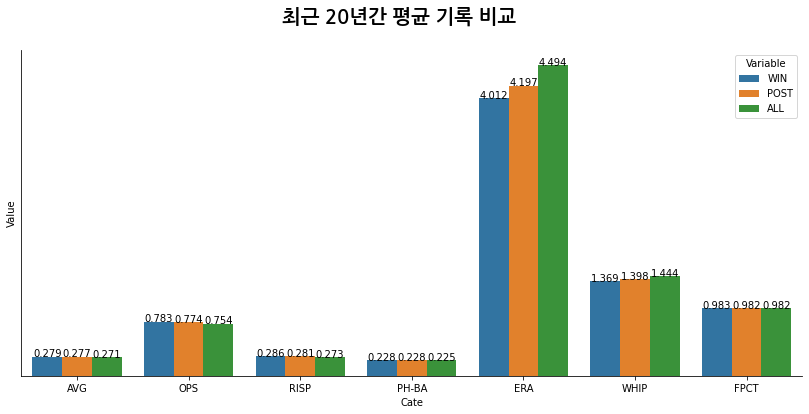

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

# feature_df = 승리팀, 포스트 시즌 진출팀, 모든팀

graph_df = feature_df.melt(id_vars='CATE').rename(columns=str.title)

sns.barplot(x='Cate',
            y='Value',
            hue='Variable',
            data=graph_df,
            ax=ax # barplot을 그려줄 곳
            )

sns.despine(fig)

ax.grid(False)
ax.set_yticks([])

fig.suptitle('최근 20년간 평균 기록 비교', fontproperties=title_font)

# 각 막대 그래프마다 수치 표시

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    label = '{:.3f}'.format(y_value)
    plt.annotate(label, (x_value, y_value), ha='center', fontsize=10)
    
plt.show()

# 최종결과
  * 높을 수록 승리할 확률이 높다.
    - AVG(타율) 
    - OPS(출루율 + 장타율)
    - RISP(득점권타율)
    - ~PH-BA(대타 타율)~ -> 데이터상 부적합
    - FPCT(수비율)
  * 낮을 수록 승리할 확률이 높다.
    - ERA(평균자책점)
    - WHIP(이닝당출루허용)